# EUR/PLN Time series - Currency exchange rate predictions 3/3 - Machine Learning Models


## Introduction

In this notebook, on the data already prepared, I will apply the Machine Learning approach to predicting values in time series. For this I will use 15 ML models and one neural network from the sklearn library.

Models used:
1. ElasticNet
2. Lasso
3. Ridge
4. Linear Regression
5. SVR - Kernel: RBF
6. Decision Tree
7. Random Forest
8. KNN
9. Ensamble estimator: BaggingRegressor with Decision Tree and Ridge models
11. Extra Tree
12. Ada Boost
13. Gradient Boost
14. XGBoost with Random and Grid Search
16. Multi-layer Perceptron regressor

## Imports

In [1]:
#Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from scipy import stats
from datetime import datetime

#Pipeline & Split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline


#Utilitis
from scipy.stats.distributions import uniform, randint
import missingno as msno
import glob
import re

#Preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose


#Models
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor

#Metrics
from sklearn import metrics



import warnings
warnings.filterwarnings("ignore")

import pickle

### Loading data

In [235]:
df = pd.read_csv('Data/currencies_and_indicators.csv', index_col = 'Date')

In [236]:
df.head()

,USD,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,SEK,...,Wydajność pracy (% r/r),Jednostkowe koszty pracy (% r/r),Produkt potencjalny (% r/r),Luka popytowa (% PKB potencjalnego),"Indeks cen surowców rolnych (USD; 2010=1,00)","Indeks cen surowców energetycznych (USD; 2010=1,00)",Poziom cen za granicą (% r/r),PKB za granicą (% r/r),Saldo rachunku bieżącego i rachunku kapitałowego (% PKB),WIBOR 3M (%)
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-04,1.1789,133.73,NaN,35.107,7.4501,0.71110,251.48,4.0712,NaN,9.4696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-05,1.1790,130.96,NaN,34.917,7.4495,0.71220,250.80,4.0245,NaN,9.4025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-06,1.1743,131.42,NaN,34.850,7.4452,0.70760,250.67,4.0065,NaN,9.3050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-07,1.1632,129.43,NaN,34.886,7.4431,0.70585,250.09,4.0165,NaN,9.1800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-08,1.1659,130.09,NaN,34.938,7.4433,0.70940,250.15,4.0363,NaN,9.1650,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5701 entries, 1999-01-04 to 2020-11-09
Data columns (total 76 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   USD                                                                             5701 non-null   float64
 1   JPY                                                                             5701 non-null   float64
 2   BGN                                                                             5299 non-null   float64
 3   CZK                                                                             5701 non-null   float64
 4   DKK                                                                             5701 non-null   float64
 5   GBP                                                                             5701 non-null   float64
 6   HUF   

In [238]:
df.isna().sum()

USD                                                            0
JPY                                                            0
BGN                                                          402
CZK                                                            0
DKK                                                            0
                                                            ... 
Indeks cen surowców energetycznych (USD; 2010=1,00)         2346
Poziom cen za granicą (% r/r)                               2346
PKB za granicą (% r/r)                                      2346
Saldo rachunku bieżącego i rachunku kapitałowego (% PKB)    2346
WIBOR 3M (%)                                                2346
Length: 76, dtype: int64

In [239]:
df.loc['2008-01-03':].isna().sum().values

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  782,
        261,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0, 2703,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int64)

In [240]:
df_cut = df.loc['2008-01-03':]

In [241]:
df_cut = df.copy()

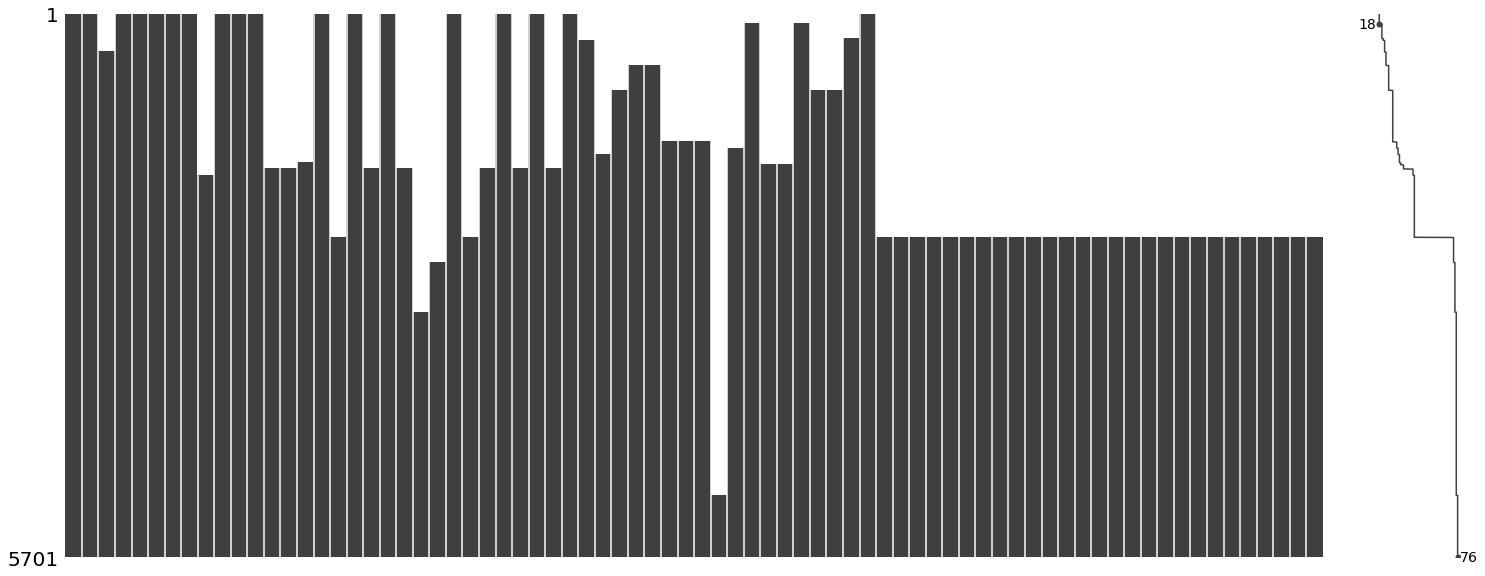

In [242]:
msno.matrix(df_cut)
plt.show()

In [243]:
#df_cut = df_cut.dropna(axis=1)

In [244]:
df_cut['Exch rate']

Date
1999-01-04    104.1583
1999-01-05    104.7873
1999-01-06    105.8575
1999-01-07    105.8575
1999-01-08    105.6341
                ...   
2020-11-03     91.6251
2020-11-04     92.3143
2020-11-05     92.8912
2020-11-06     93.4708
2020-11-09     93.2163
Name: Exch rate, Length: 5701, dtype: float64

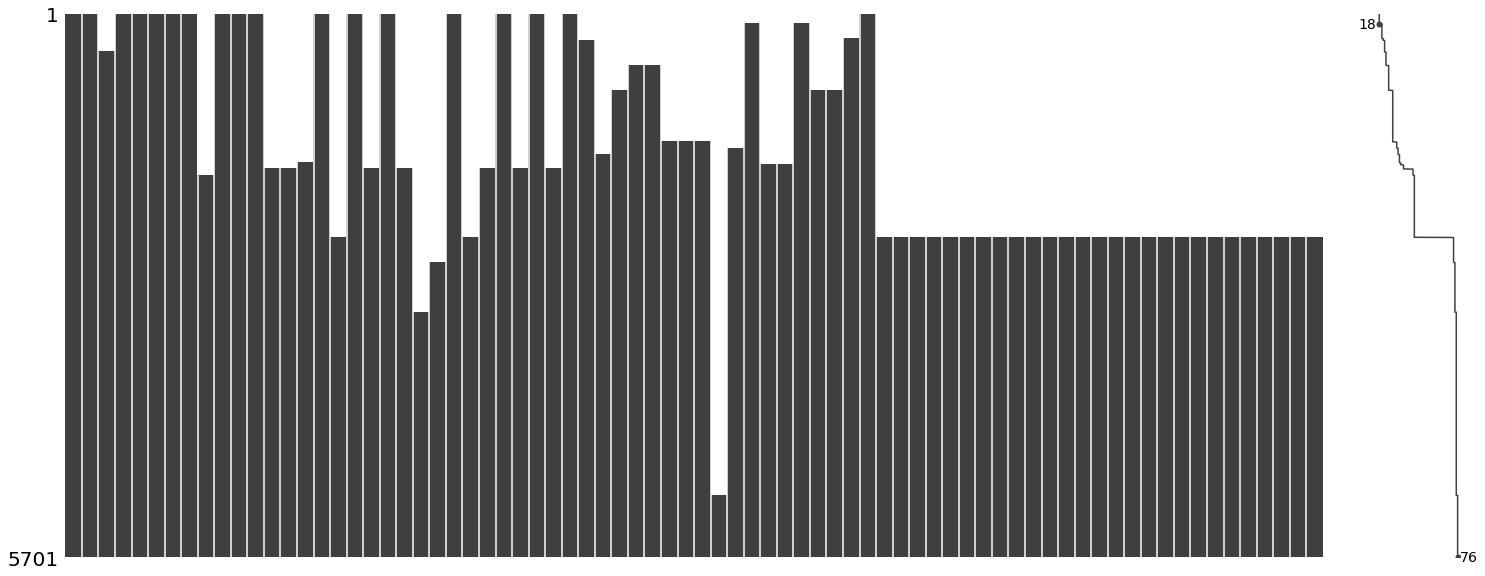

In [245]:
msno.matrix(df_cut)
plt.show()

In [246]:
pln_corr_matrix = df_cut.corr()[['PLN']]

In [247]:
pln_corr_matrix

,PLN
USD,-0.062179
JPY,-0.215017
BGN,0.107048
CZK,-0.013162
DKK,-0.189079
...,...
"Indeks cen surowców energetycznych (USD; 2010=1,00)",-0.680038
Poziom cen za granicą (% r/r),-0.362891
PKB za granicą (% r/r),-0.322405
Saldo rachunku bieżącego i rachunku kapitałowego (% PKB),0.678204


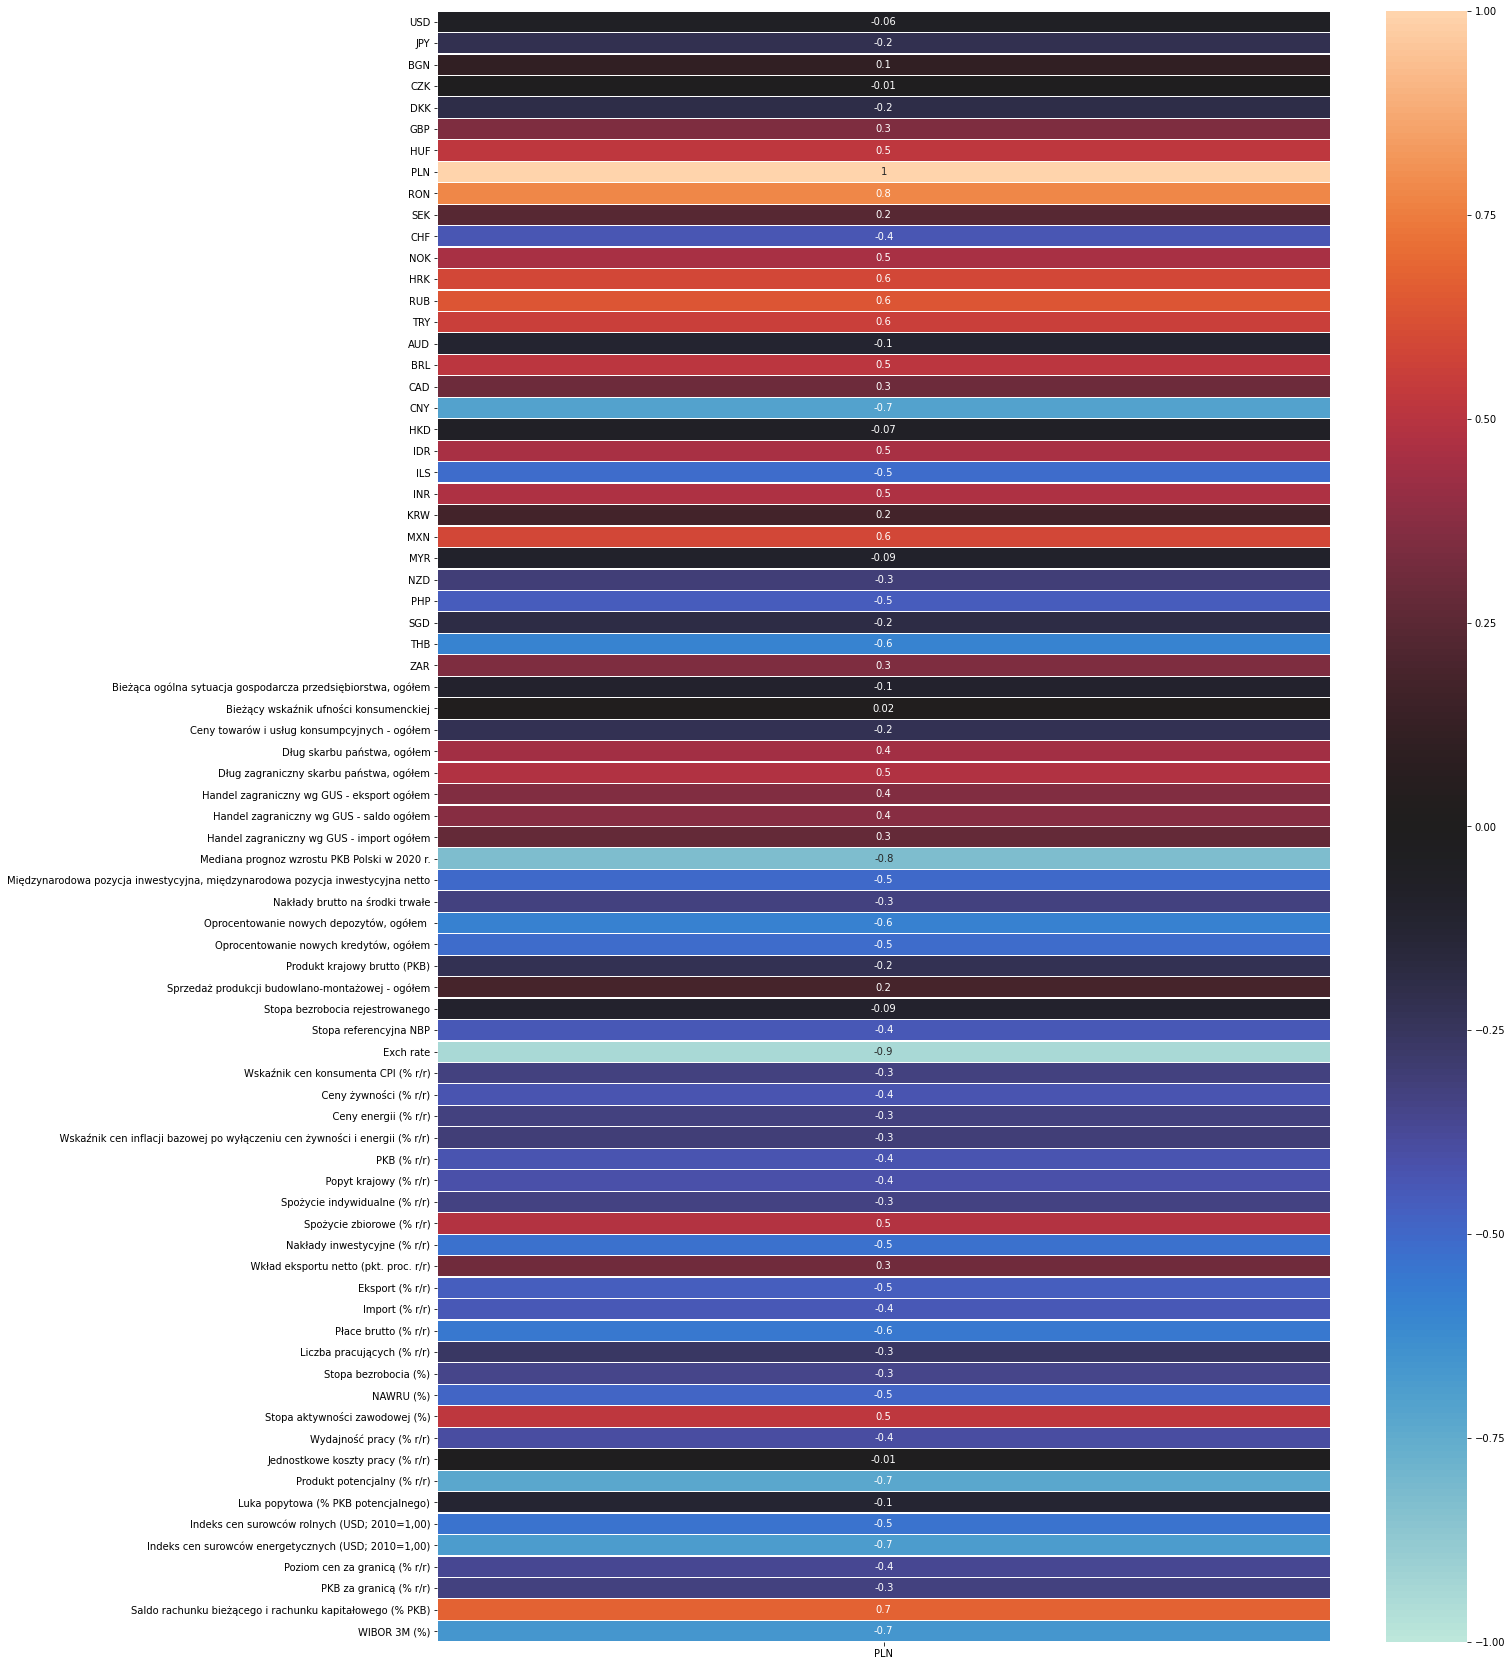

In [248]:
f,ax = plt.subplots(figsize=(20, 30))
sns.heatmap(pln_corr_matrix, vmin=-1, vmax=1, center=0, robust=False, annot=True, fmt='.1g', annot_kws=None, linewidths=0.2, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)
plt.show()

#### Columns with high correlation

In [249]:
treshold = 0.70

In [250]:
corr_data_to_print = pln_corr_matrix[((pln_corr_matrix['PLN'] > treshold) | (pln_corr_matrix['PLN'] < - treshold))][['PLN']]
corr_data_to_print

,PLN
PLN,1.000000
RON,0.775698
CNY,-0.706881
Mediana prognoz wzrostu PKB Polski w 2020 r.,-0.820346
Exch rate,-0.940972
Produkt potencjalny (% r/r),-0.727067


#### Columns with low correlation

In [18]:
corr_data_to_print = pln_corr_matrix[((pln_corr_matrix['PLN'] < treshold) & (pln_corr_matrix['PLN'] > - treshold))][['PLN']]
corr_data_to_print

,PLN
USD,-0.062179
JPY,-0.215017
CZK,-0.013162
DKK,-0.189079
GBP,0.347323
HUF,0.518417
SEK,0.236645
CHF,-0.430022
NOK,0.455641
AUD,-0.113065


In [19]:
to_shift = [c for c in corr_data_to_print.index if len(c) == 3 and c != 'PLN' ]
to_shift

['USD',
 'JPY',
 'CZK',
 'DKK',
 'GBP',
 'HUF',
 'SEK',
 'CHF',
 'NOK',
 'AUD',
 'CAD',
 'HKD',
 'KRW',
 'NZD',
 'SGD',
 'ZAR']

In [20]:
if len(to_shift) == 0:
    to_shift = None

In [21]:
df_pl = df_cut[['PLN']]


In [22]:
df_pl.head()

,PLN
Date,
1999-01-04,4.0712
1999-01-05,4.0245
1999-01-06,4.0065
1999-01-07,4.0165
1999-01-08,4.0363


### Multiply the value by 10,000 to make the results easier to read.

In [23]:
df_pl['PLN'] = df_pl['PLN'].mul(10000)


In [24]:
df_pl.shape

(5701, 1)

In [194]:
df_pl.tail()

,PLN
Date,
2020-11-03,45680.0
2020-11-04,45368.0
2020-11-05,45134.0
2020-11-06,45263.0
2020-11-09,44670.0


In [25]:
df_pl.index= pd.to_datetime(df_pl.index)
print(pd.infer_freq(df_pl.index))

B


## Important note

Due to the problems I encountered while training models with additional parameters and the fact that many columns lacked historical data from 1999, they only started from 2008 etc. In the end, I only used additional generated features because I wanted the models to learn for the longest possible time frame.

## Feature Engineering Transformer

In [26]:
class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, lags = 8, to_shift = None):
        self.lags = lags
        self.to_shift = to_shift
    def fit( self, X, y = None ):
        return self
    def transform( self, X, y = None ):
        df_features = X.copy()
        # seasonality
        df_features['seasonality'] = seasonal_decompose(df_features['PLN']).seasonal
        df_features['trend'] = seasonal_decompose(df_features['PLN']).trend
        # 'Rolling statistics'
        moving_window = list(range(2,8)).extend([14,30])
        for i in range(2,8):
            df_features[f'mov_avg_{i}'] = df_features['PLN'].rolling(window=i).mean()
            df_features[f'mov_std_{i}'] = df_features['PLN'].rolling(window=i).std()

        # 'Generate traffic_lag'
        for i in range(2, self.lags+1):
            df_features[f'PLN_lag_{i}'] = df_features['PLN'].shift(i)
        if self.to_shift is not None:
            for c in self.to_shift:
                df_features[f'{c}_lag_1'] = df_features[c].shift(1)
        
        # 'Generate Data-related features', 'is_weekend'
        df_features['date'] = pd.to_datetime(df_features.index)
        #df_features['month'] = df_features['date'].dt.month
        #df_features['month_day'] = df_features['date'].dt.day
        #df_features['day_of_week'] = df_features['date'].dt.dayofweek # 0 - Monday; 6 - Sunday
        # drop missing values and unnecessary columns
        df_features = df_features.dropna()
        df_features = df_features.drop('date', axis=1)
        if self.to_shift is not None:
            df_features = df_features.drop(self.to_shift, axis=1)
        return df_features

In [27]:
df_pl1 = df_pl.copy()
print(pd.infer_freq(df_pl1.index))

B


In [28]:
my_features = FeatureEngineeringTransformer(lags=14,to_shift=None)
df_pl2 = my_features.fit_transform(df_pl1)

In [193]:
df_pl2.tail()

,PLN,seasonality,trend,mov_avg_2,mov_std_2,mov_avg_3,mov_std_3,mov_avg_4,mov_std_4,mov_avg_5,...,PLN_lag_5,PLN_lag_6,PLN_lag_7,PLN_lag_8,PLN_lag_9,PLN_lag_10,PLN_lag_11,PLN_lag_12,PLN_lag_13,PLN_lag_14
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-30,46222.0,13.123838,46069.4,46223.5,2.121321,46216.333333,12.503333,46122.75,187.444881,46058.0,...,45823.0,45783.0,45740.0,45809.0,45723.0,45558.0,45518.0,45073.0,44851.0,44810.0
2020-11-02,46018.0,-10.321816,45902.6,46120.0,144.249783,46155.000000,118.654962,46166.75,99.690772,46101.8,...,45799.0,45823.0,45783.0,45740.0,45809.0,45723.0,45558.0,45518.0,45073.0,44851.0
2020-11-03,45680.0,-8.693897,45684.4,45849.0,239.002092,45973.333333,273.746842,46036.25,256.500000,46069.4,...,45842.0,45799.0,45823.0,45783.0,45740.0,45809.0,45723.0,45558.0,45518.0,45073.0
2020-11-04,45368.0,-1.295905,45492.6,45524.0,220.617316,45688.666667,325.086655,45822.00,376.251689,45902.6,...,46202.0,45842.0,45799.0,45823.0,45783.0,45740.0,45809.0,45723.0,45558.0,45518.0
2020-11-05,45134.0,7.187780,45223.0,45251.0,165.462987,45394.000000,273.926998,45550.00,383.885400,45684.4,...,46225.0,46202.0,45842.0,45799.0,45823.0,45783.0,45740.0,45809.0,45723.0,45558.0


In [30]:
df_pl2.isna().sum()

PLN            0
seasonality    0
trend          0
mov_avg_2      0
mov_std_2      0
mov_avg_3      0
mov_std_3      0
mov_avg_4      0
mov_std_4      0
mov_avg_5      0
mov_std_5      0
mov_avg_6      0
mov_std_6      0
mov_avg_7      0
mov_std_7      0
PLN_lag_2      0
PLN_lag_3      0
PLN_lag_4      0
PLN_lag_5      0
PLN_lag_6      0
PLN_lag_7      0
PLN_lag_8      0
PLN_lag_9      0
PLN_lag_10     0
PLN_lag_11     0
PLN_lag_12     0
PLN_lag_13     0
PLN_lag_14     0
dtype: int64

### Assinge y and X

In [31]:
X = df_pl2.drop('PLN',axis=1)
y = df_pl2[['PLN']]

In [32]:
X.shape

(5685, 27)

### Spliting data

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle = False)
tss_cv = TimeSeriesSplit(n_splits = 5)

In [34]:
X_train.shape, X_test.shape

((4548, 27), (1137, 27))

In [35]:
X_train

,seasonality,trend,mov_avg_2,mov_std_2,mov_avg_3,mov_std_3,mov_avg_4,mov_std_4,mov_avg_5,mov_std_5,...,PLN_lag_5,PLN_lag_6,PLN_lag_7,PLN_lag_8,PLN_lag_9,PLN_lag_10,PLN_lag_11,PLN_lag_12,PLN_lag_13,PLN_lag_14
Date,,,,,,,,,,,,,,,,,,,,,
1999-01-22,13.123838,41431.0,41432.0,219.203102,41237.000000,371.618084,41171.00,330.893739,41070.2,364.583598,...,42000.0,41335.0,42033.0,40330.0,40320.0,40363.0,40165.0,40065.0,40245.0,40712.0
1999-01-25,-10.321816,41579.2,41597.0,14.142136,41490.333333,185.022521,41329.50,355.375388,41258.2,346.608136,...,40667.0,42000.0,41335.0,42033.0,40330.0,40320.0,40363.0,40165.0,40065.0,40245.0
1999-01-26,-8.693897,41600.0,41722.0,162.634560,41677.000000,138.924440,41577.00,229.927525,41431.0,382.400314,...,40973.0,40667.0,42000.0,41335.0,42033.0,40330.0,40320.0,40363.0,40165.0,40065.0
1999-01-27,-1.295905,41604.6,41712.5,176.069589,41677.333333,138.601347,41654.75,121.847924,41579.2,199.183835,...,40847.0,40973.0,40667.0,42000.0,41335.0,42033.0,40330.0,40320.0,40363.0,40165.0
1999-01-28,7.187780,41755.2,41484.5,146.371104,41602.000000,228.322141,41603.25,186.441009,41600.0,161.626112,...,41277.0,40847.0,40973.0,40667.0,42000.0,41335.0,42033.0,40330.0,40320.0,40363.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-22,-1.295905,43964.4,43888.0,145.663997,43900.333333,105.191888,44041.00,294.151888,44130.8,324.367384,...,44119.0,44332.0,43884.0,43591.0,43321.0,43228.0,43486.0,43776.0,43861.0,43903.0
2016-06-23,7.187780,44103.2,43678.0,151.320851,43782.333333,210.012698,43818.00,185.720220,43947.0,330.263531,...,44490.0,44119.0,44332.0,43884.0,43591.0,43321.0,43228.0,43486.0,43776.0,43861.0
2016-06-24,13.123838,44187.6,44060.5,692.257539,43968.666667,514.694408,43974.25,420.394557,43964.4,364.737988,...,44463.0,44490.0,44119.0,44332.0,43884.0,43591.0,43321.0,43228.0,43486.0,43776.0


In [36]:
y_train.shape, y_test.shape

((4548, 1), (1137, 1))

#### def Combine plots

In [ ]:
def combine_plots(train, test, predict = None, index = None, zoom_start = None,zoom_end = None, Title = ''):
    def get_cmap(n, name='hsv'):
        return plt.cm.get_cmap(name, n)
    cmap = get_cmap(20)
    temp_df = pd.DataFrame(index = index)
    temp_df['test'] = test
    temp_df['train'] = train
    
    temp_df[zoom_start:zoom_end].train.plot(figsize= (20,8), color = cmap(1), legend = 'Train')
    temp_df[zoom_start:zoom_end].test.plot(color = cmap(8), alpha = 0.5, legend = 'Test')
    if predict is not None:
        cmap = get_cmap(len(predict)+1)
        for i,c in enumerate(predict, start=1):
            temp_df_pred = pd.DataFrame(c,index =test.index )
            temp_df[f'predict_{i}'] = temp_df_pred
            temp_df.loc[zoom_start:zoom_end,f'predict_{i}'].plot( alpha = 0.8, legend = 'Predict')#color = cmap(5*i+5),
    plt.ylabel('pln')
    plt.title(f'EUR/PLN Train and Test Data {Title}', size = 20)
    plt.show()

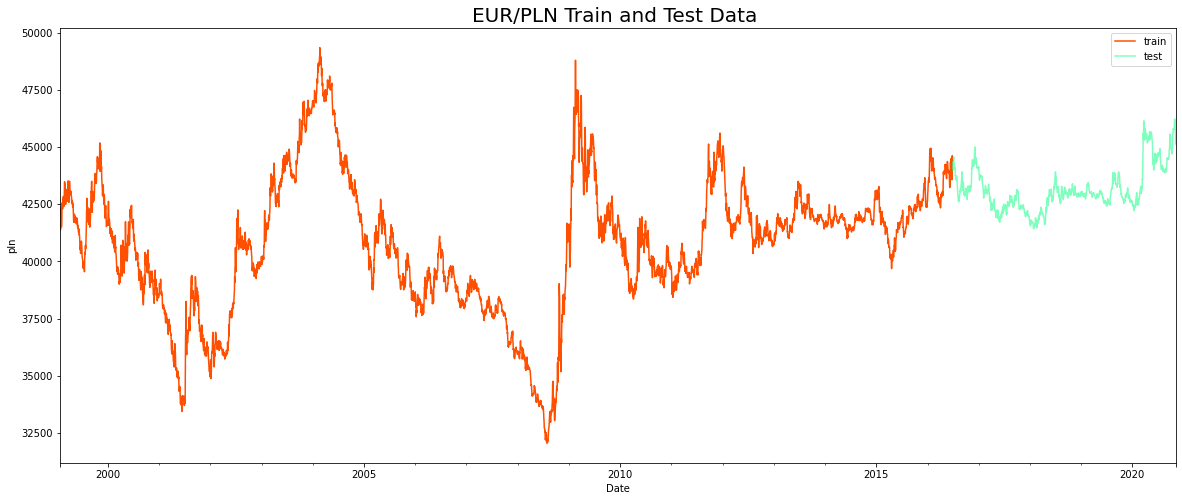

In [141]:
combine_plots(y_train.PLN,y_test.PLN,index = df_pl2.index)

### Set n_job = THREAD

In [39]:
THREADS = 10
VERBOSE = 1

## Models

#### Save model function

In [134]:
def save_model(model, filename = None):
    t = datetime.now()
    time = t.strftime("%Y_%m_%d_%H_%M_%S")
    if filename is None:
        filename = f'Models/Features/{model.best_estimator_.steps[-1][0]}_{time}.pkl'
    else:
        filename = f'Models/Features/{filename}_{time}.pkl'
    outfile = open(filename,'wb')
    pickle.dump(model,outfile)
    outfile.close()
    

#### Load model function

In [119]:
def load_model(path):
    file_list = glob.glob(f'{path}*.pkl')
    #print(file_list)
    file_list_len = len(file_list)
    models = []
    
    for i in range(file_list_len):
        try:
            pkl_file = open(file_list[i], 'rb')
            mymodel = pickle.load(pkl_file)
            m = re.search('\\\\(.*)\.pkl', file_list[i])
            model_name = 'temp'
            if m:
                model_name = m.group(1) 
            print(f'Model index {i}: {model_name}')
            models.append((model_name,mymodel))
            pkl_file.close()
        except(e):
            print('Load error',e)
            pkl_file.close()
            break
    return models

### ElasticNet

In [118]:
start = datetime.now()

print(f'Line start at: {start}')
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    #('pca', PCA(n_components=0.8)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('ElasticNet', ElasticNet(alpha=1, tol=0.1))
]
pipeline = Pipeline(steps=steps)


param_grid = {
            'transform': [None,PowerTransformer(method='yeo-johnson')],
            'scale': [None,StandardScaler()],
            #'pca__n_components': [0.8],
            'polynomialfeatures__degree': [1, 2,3,4],
            'ElasticNet__tol': [0.001,0.01, 0.05, 0.1, 0.2],
            'ElasticNet__alpha': [1., 2., 3.],
}

grid_1 = GridSearchCV(pipeline, param_grid=param_grid, cv=tss_cv,
                    refit=True,verbose=VERBOSE,n_jobs = THREADS)

grid_1.fit(X_train, y_train)
end = datetime.now()
save_model(grid_1)
print(grid_1.best_params_)
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-12 15:48:12.185448
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    3.5s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed: 12.6min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed: 20.8min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed: 41.4min
[Parallel(n_jobs=10)]: Done 1200 out of 1200 | elapsed: 63.1min finished


{'ElasticNet__alpha': 1.0, 'ElasticNet__tol': 0.001, 'polynomialfeatures__degree': 3, 'scale': None, 'transform': None}
Line end at: 2020-12-12 16:51:21.200523
The process took: 1:03:09.015075


### Lasso

In [149]:
start = datetime.now()

print(f'Line start at: {start}')
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.8)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('lasso', Lasso(alpha=1, tol=0.1))
]
pipeline = Pipeline(steps=steps)


param_grid = {
            'transform': [None,PowerTransformer(method='yeo-johnson')],
            'scale': [None, StandardScaler(), MinMaxScaler()],
            'pca__n_components': [0.2,0.5,0.6,0.8,1.0],
            'polynomialfeatures__degree': [1, 2, 3, 4],
            'lasso__tol': [0.001,0.01, 0.05, 0.1, 0.2],
            'lasso__alpha': [1., 2., 3.],
}

grid_2 = GridSearchCV(pipeline, param_grid=param_grid, cv=tss_cv,
                    refit=True,verbose=VERBOSE,n_jobs = THREADS)

grid_2.fit(X_train, y_train)
end = datetime.now()
save_model(grid_2)
print(grid_2.best_params_)
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-10 11:48:13.929181
Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 620 tasks      | elapsed:    8.4s
[Parallel(n_jobs=10)]: Done 1620 tasks      | elapsed:   21.9s
[Parallel(n_jobs=10)]: Done 3020 tasks      | elapsed:   40.7s
[Parallel(n_jobs=10)]: Done 4820 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 7020 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 8981 out of 9000 | elapsed:  2.1min remaining:    0.2s


{'lasso__alpha': 1.0, 'lasso__tol': 0.001, 'pca__n_components': 0.8, 'polynomialfeatures__degree': 1, 'scale': MinMaxScaler(), 'transform': None}
Line end at: 2020-12-10 11:50:22.794072
The process took: 0:02:08.864891


[Parallel(n_jobs=10)]: Done 9000 out of 9000 | elapsed:  2.1min finished


### Ridge

In [150]:
start = datetime.now()

print(f'Line start at: {start}')
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.8)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('ridge', Ridge(alpha=1, tol=0.1))
]
pipeline = Pipeline(steps=steps)


param_grid = {
            'transform': [None,PowerTransformer(method='yeo-johnson')],
            'scale': [None, StandardScaler(), MinMaxScaler()],
            'pca__n_components': [0.2,0.5,0.6,0.8,1.0],
            'polynomialfeatures__degree': [1, 2, 3, 4],
            'ridge__tol': [0.001,0.01, 0.05, 0.1, 0.2],
            'ridge__alpha': [1., 2., 3.],
}

grid_3 = GridSearchCV(pipeline, param_grid=param_grid, cv=tss_cv,
                    refit=True,verbose=VERBOSE,n_jobs = THREADS)

grid_3.fit(X_train, y_train)
end = datetime.now()
save_model(grid_3)
print(grid_3.best_params_)
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-10 11:50:23.189678
Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    5.2s
[Parallel(n_jobs=10)]: Done 840 tasks      | elapsed:   12.4s
[Parallel(n_jobs=10)]: Done 1540 tasks      | elapsed:   23.5s
[Parallel(n_jobs=10)]: Done 2440 tasks      | elapsed:   36.9s
[Parallel(n_jobs=10)]: Done 3540 tasks      | elapsed:   53.3s
[Parallel(n_jobs=10)]: Done 4840 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 6340 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 8040 tasks      | elapsed:  2.1min


{'pca__n_components': 0.8, 'polynomialfeatures__degree': 1, 'ridge__alpha': 1.0, 'ridge__tol': 0.001, 'scale': MinMaxScaler(), 'transform': None}
Line end at: 2020-12-10 11:52:42.731149
The process took: 0:02:19.541471


[Parallel(n_jobs=10)]: Done 9000 out of 9000 | elapsed:  2.3min finished


### LinearRegression

In [94]:
start = datetime.now()

print(f'Line start at: {start}')
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.8)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('lr', LinearRegression())
]
pipeline = Pipeline(steps=steps)


param_grid = {
            'transform': [None,PowerTransformer(method='yeo-johnson')],
            'scale': [None, StandardScaler(), MinMaxScaler()],
            'pca__n_components': [0.8,0.5],
            'polynomialfeatures__degree': [1,2,3,4],
            'lr__normalize': [False, True],
}

grid_4 = GridSearchCV(pipeline, param_grid=param_grid, cv=tss_cv,
                    refit=True,verbose=VERBOSE,n_jobs = THREADS)

grid_4.fit(X_train, y_train)
end = datetime.now()
save_model(grid_4)
print(grid_4.best_params_)
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-12 10:28:28.805957
Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.5s


{'lr__normalize': False, 'pca__n_components': 0.8, 'polynomialfeatures__degree': 1, 'scale': MinMaxScaler(), 'transform': None}
Line end at: 2020-12-12 10:28:36.964135
The process took: 0:00:08.158178


[Parallel(n_jobs=10)]: Done 480 out of 480 | elapsed:    8.0s finished


### SVR - RBF

In [43]:
start = datetime.now()

print(f'Line start at: {start}')
steps = [
    
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.8)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('svr', SVR(kernel='rbf',C=1))
]
pipeline = Pipeline(steps=steps)


param_grid = {
            'transform': [None,PowerTransformer(method='yeo-johnson')],
            'scale': [None, StandardScaler(), MinMaxScaler()],
            'pca__n_components': [0.2,0.8],
            'polynomialfeatures__degree': [1, 2, 3, 4],
            'svr__C': [ 0.01, 0.1, 1, 10, 100,1000,10000],
            'svr__gamma': [0.0001,0.001, 0.01,1,10,100,1000]
}

grid_5 = GridSearchCV(pipeline, param_grid=param_grid, cv=tss_cv,
                    refit=True,verbose=VERBOSE,n_jobs = THREADS)

grid_5.fit(X_train, y_train)
end = datetime.now()
save_model(grid_5)
print(grid_5.best_params_)
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-11 00:23:50.245362
Fitting 5 folds for each of 2352 candidates, totalling 11760 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    4.5s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   15.2s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   34.8s
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:  3.2min
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed:  4.2min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed:  5.6min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed:  7.0min
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed:  8.6min
[Parallel(n_jobs=10)]: Done 7180 tasks      | elapsed: 10.3min
[Parallel(n_jobs=10)]: Done 8430 tasks      | elapsed: 12.4min
[Parallel(n_jobs=10)]: Done 9780 tasks      | elapsed: 14.7min
[Parallel(n_jobs=10)]: Done 11230 tasks      

{'pca__n_components': 0.8, 'polynomialfeatures__degree': 1, 'scale': StandardScaler(), 'svr__C': 10000, 'svr__gamma': 0.0001, 'transform': None}
Line end at: 2020-12-11 00:42:02.959204
The process took: 0:18:12.713842


### Decision Tree

In [48]:
start = datetime.now()

print(f'Line start at: {start}')
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.8)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('tree', DecisionTreeRegressor())
]
pipeline = Pipeline(steps=steps)


param_grid = {
            'transform': [None,PowerTransformer(method='yeo-johnson')],
            'scale': [None, StandardScaler(), MinMaxScaler()],
            'pca__n_components': [0.8,0.5],
            'polynomialfeatures__degree': [1, 2], #[1, 2, 3, 4],
            "tree__criterion": ["mse", "friedman_mse","mae"],
            "tree__max_depth": [2,20,50, None], #[2, 5, 10, 15,20,30, None],
            "tree__min_samples_split": [2, 15], #[2, 5, 10, 15], 
            "tree__splitter": ["best", "random"],
            "tree__min_samples_leaf": [ 3, 10], #[ 3, 4, 5,8,10],
            "tree__max_features": ["auto","sqrt","log2"],
            "tree__ccp_alpha" : [0.0, 0.1],
            "tree__max_leaf_nodes": [2, 3, None] #[1, 2, 5, 10, 20, None]
}

grid_6 = GridSearchCV(pipeline, param_grid=param_grid, cv=tss_cv,
                    refit=True,verbose=VERBOSE,n_jobs = THREADS)

grid_6.fit(X_train, y_train)
end = datetime.now()
save_model(grid_6)
print(grid_6.best_params_)
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-11 00:43:56.370097
Fitting 5 folds for each of 41472 candidates, totalling 207360 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.4s
[Parallel(n_jobs=10)]: Done 1300 tasks      | elapsed:    4.9s
[Parallel(n_jobs=10)]: Done 5300 tasks      | elapsed:   17.4s
[Parallel(n_jobs=10)]: Done 9120 tasks      | elapsed:   40.1s
[Parallel(n_jobs=10)]: Done 9570 tasks      | elapsed:   50.9s
[Parallel(n_jobs=10)]: Done 10120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 10770 tasks      | elapsed:  1.3min
[Parallel(n_jobs=10)]: Done 11520 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 12370 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 13320 tasks      | elapsed:  2.6min
[Parallel(n_jobs=10)]: Done 14370 tasks      | elapsed:  3.0min
[Parallel(n_jobs=10)]: Done 15520 tasks      | elapsed:  3.5min
[Parallel(n_jobs=10)]: Done 16770 tasks      | elapsed:  4.1min
[Parallel(n_jobs=10)]: Done 23030 tasks      | elapsed:  4.8min
[Parallel(n_jobs=10)]: Done 27750

{'pca__n_components': 0.5, 'polynomialfeatures__degree': 2, 'scale': None, 'transform': None, 'tree__ccp_alpha': 0.1, 'tree__criterion': 'friedman_mse', 'tree__max_depth': 20, 'tree__max_features': 'auto', 'tree__max_leaf_nodes': None, 'tree__min_samples_leaf': 10, 'tree__min_samples_split': 2, 'tree__splitter': 'random'}
Line end at: 2020-12-11 01:40:25.710973
The process took: 0:56:29.340876


### Random Forest

In [49]:
start = datetime.now()

print(f'Line start at: {start}')
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.8)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('rf', RandomForestRegressor())
]
pipeline = Pipeline(steps=steps)


param_grid = {
            'transform': [None,PowerTransformer(method='yeo-johnson')],
            'scale': [None, StandardScaler()], #MinMaxScaler()
            'pca__n_components': [0.8],
            'polynomialfeatures__degree': [1, 2],  #[1, 2, 3, 4],
            'rf__n_estimators': [150],  #, 300
            "rf__criterion": ["mae", "msa"],  #
            "rf__max_depth": [2, None],  #[2, 30, None],
            "rf__min_samples_split": [2, 15],  #[2, 5, 10, 15],
            "rf__min_samples_leaf": [ 3,10],  #[ 3, 4, 5,8,10],
            "rf__max_features": ["auto","log2"],  #"sqrt",
            "rf__ccp_alpha" : [0.0, 0.1],  #[0.0,0.05, 0.1],
            "rf__max_leaf_nodes": [2,3,  None]  #[1, 2, 5, 10, 20, None]
}

grid_7 = GridSearchCV(pipeline, param_grid=param_grid, cv=tss_cv,
                    refit=True,verbose=VERBOSE,n_jobs = THREADS)

grid_7.fit(X_train, y_train)
end = datetime.now()
save_model(grid_7)
print(grid_7.best_params_)
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-11 01:40:26.168353
Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   18.8s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  1.9min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  3.9min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  8.0min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  9.9min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed: 10.1min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed: 14.6min
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed: 19.5min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed: 23.9min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed: 37.0min
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed: 42.8min
[Parallel(n_jobs=10)]: Done 7180 tasks      | elapsed: 54.6min
[Parallel(n_jobs=10)]: Done 7680 out of 7680 | elapsed: 54.8min finished


{'pca__n_components': 0.8, 'polynomialfeatures__degree': 1, 'rf__ccp_alpha': 0.1, 'rf__criterion': 'mae', 'rf__max_depth': None, 'rf__max_features': 'log2', 'rf__max_leaf_nodes': None, 'rf__min_samples_leaf': 10, 'rf__min_samples_split': 15, 'rf__n_estimators': 150, 'scale': None, 'transform': None}
Line end at: 2020-12-11 02:35:21.443159
The process took: 0:54:55.274806


### KNN

In [50]:
start = datetime.now()

print(f'Line start at: {start}')
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.8)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('knn', KNeighborsRegressor())
]
pipeline = Pipeline(steps=steps)


param_grid = {
            'transform': [None,PowerTransformer(method='yeo-johnson')],
            'scale': [None, StandardScaler()], #MinMaxScaler()
            'pca__n_components': [0.8],
            'polynomialfeatures__degree': [1, 2],  #[1, 2, 3, 4],
            "knn__n_neighbors": [2, 5, 10, 20,30,40],
            "knn__p" : [2,3,4],
            "knn__metric": ["minkowski"],
            "knn__weights": ['uniform','distance'],
            "knn__algorithm" : [ 'auto', 'ball_tree', 'kd_tree', 'brute'],
            "knn__leaf_size" : [10,20,30,40],
}

grid_8 = GridSearchCV(pipeline, param_grid=param_grid, cv=tss_cv,
                    refit=True,verbose=VERBOSE,n_jobs = THREADS)

grid_8.fit(X_train, y_train)
end = datetime.now()
save_model(grid_8)
print(grid_8.best_params_)
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-11 02:35:21.871769
Fitting 5 folds for each of 4608 candidates, totalling 23040 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 620 tasks      | elapsed:    8.6s
[Parallel(n_jobs=10)]: Done 1620 tasks      | elapsed:   23.9s
[Parallel(n_jobs=10)]: Done 3020 tasks      | elapsed:   45.2s
[Parallel(n_jobs=10)]: Done 4820 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 7002 tasks      | elapsed:  1.8min
[Parallel(n_jobs=10)]: Done 7670 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 8420 tasks      | elapsed:  2.3min
[Parallel(n_jobs=10)]: Done 9270 tasks      | elapsed:  2.6min
[Parallel(n_jobs=10)]: Done 10220 tasks      | elapsed:  3.0min
[Parallel(n_jobs=10)]: Done 11270 tasks      | elapsed:  3.4min
[Parallel(n_jobs=10)]: Done 12420 tasks      | elapsed:  3.7min
[Parallel(n_jobs=10)]: Done 13670 tasks      | elapsed:  4.0min
[Parallel(n_jobs=10)]: Done 15020 tasks      | elapsed:  4.4min
[Parallel(n_jobs=10)]: Done 16470 task

{'knn__algorithm': 'auto', 'knn__leaf_size': 10, 'knn__metric': 'minkowski', 'knn__n_neighbors': 10, 'knn__p': 2, 'knn__weights': 'uniform', 'pca__n_components': 0.8, 'polynomialfeatures__degree': 1, 'scale': None, 'transform': None}
Line end at: 2020-12-11 02:44:31.444985
The process took: 0:09:09.573216


[Parallel(n_jobs=10)]: Done 23040 out of 23040 | elapsed:  9.2min finished


### Bagging DT

In [51]:
start = datetime.now()

print(f'Line start at: {start}')
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.8)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('BaggingRegressor_tree', BaggingRegressor(DecisionTreeRegressor()))
]
pipeline = Pipeline(steps=steps)


param_grid = {
            'transform': [None,PowerTransformer(method='yeo-johnson')],
            'scale': [None, StandardScaler()], #MinMaxScaler()
            'pca__n_components': [0.8,0.2],
            'polynomialfeatures__degree': [1, 2],  #[1, 2, 3, 4],
            "BaggingRegressor_tree__n_estimators": [10], #[10,100,200]
            "BaggingRegressor_tree__max_samples" : [0.2, 0.5],#[0.2, 0.3, 0.5, 1.0]
            "BaggingRegressor_tree__max_features" : [0.2, 1.0], #0.5,
            "BaggingRegressor_tree__bootstrap" : [True,False],
    
            "BaggingRegressor_tree__base_estimator__max_depth" : [None,5],#[None, 2,5,10]
            "BaggingRegressor_tree__base_estimator__criterion": ["mae"],#["mse", "friedman_mse","mae"]
            "BaggingRegressor_tree__base_estimator__min_samples_split": [2, 5],  
            "BaggingRegressor_tree__base_estimator__splitter": ["best"],#, "random"
            "BaggingRegressor_tree__base_estimator__min_samples_leaf": [ 3, 5],
            "BaggingRegressor_tree__base_estimator__max_features": ["auto","log2"], #"sqrt",
            "BaggingRegressor_tree__base_estimator__ccp_alpha" : [0.0, 0.1],
            "BaggingRegressor_tree__base_estimator__max_leaf_nodes": [ 2, None] #5
}

grid_9 = GridSearchCV(pipeline, param_grid=param_grid, cv=tss_cv,
                    refit=True,verbose=VERBOSE,n_jobs = THREADS)

grid_9.fit(X_train, y_train)
end = datetime.now()
save_model(grid_9)
print(grid_9.best_params_)
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-11 02:44:31.901903
Fitting 5 folds for each of 8192 candidates, totalling 40960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.7s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:    8.0s
[Parallel(n_jobs=10)]: Done 760 tasks      | elapsed:   18.8s
[Parallel(n_jobs=10)]: Done 1110 tasks      | elapsed:   27.5s
[Parallel(n_jobs=10)]: Done 1560 tasks      | elapsed:   39.7s
[Parallel(n_jobs=10)]: Done 2110 tasks      | elapsed:   53.9s
[Parallel(n_jobs=10)]: Done 2760 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 3510 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 4360 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 5310 tasks      | elapsed:  2.7min
[Parallel(n_jobs=10)]: Done 6360 tasks      | elapsed:  3.1min
[Parallel(n_jobs=10)]: Done 7510 tasks      | elapsed:  3.6min
[Parallel(n_jobs=10)]: Done 8760 tasks      | elapsed:  4.2min
[Parallel(n_jobs=10)]: Done 10110 tasks      | elapsed:  4.9min
[Parallel(n_jobs=10)]: Done 11560 tasks    

{'BaggingRegressor_tree__base_estimator__ccp_alpha': 0.1, 'BaggingRegressor_tree__base_estimator__criterion': 'mae', 'BaggingRegressor_tree__base_estimator__max_depth': 5, 'BaggingRegressor_tree__base_estimator__max_features': 'auto', 'BaggingRegressor_tree__base_estimator__max_leaf_nodes': None, 'BaggingRegressor_tree__base_estimator__min_samples_leaf': 3, 'BaggingRegressor_tree__base_estimator__min_samples_split': 2, 'BaggingRegressor_tree__base_estimator__splitter': 'best', 'BaggingRegressor_tree__bootstrap': True, 'BaggingRegressor_tree__max_features': 1.0, 'BaggingRegressor_tree__max_samples': 0.5, 'BaggingRegressor_tree__n_estimators': 10, 'pca__n_components': 0.8, 'polynomialfeatures__degree': 1, 'scale': None, 'transform': None}
Line end at: 2020-12-11 03:03:45.991785
The process took: 0:19:14.089882


### Bagging Ridge

In [52]:
start = datetime.now()

print(f'Line start at: {start}')
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.8)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('BaggingRegressor_Ridge', BaggingRegressor(Ridge()))
]
pipeline = Pipeline(steps=steps)


param_grid = {
            'transform': [None,PowerTransformer(method='yeo-johnson')],
            'scale': [None, StandardScaler(),MinMaxScaler()], #MinMaxScaler()
            'pca__n_components': [0.5,0.6,0.7,0.8],
            'polynomialfeatures__degree': [1, 2],  #[1, 2, 3, 4],
            "BaggingRegressor_Ridge__n_estimators": [10,50,100],#,200
            "BaggingRegressor_Ridge__max_samples" : [0.2, 0.3],#[0.2, 0.3, 0.5, 1.0]
            "BaggingRegressor_Ridge__max_features" : [0.2,  0.5,  1.0],
            "BaggingRegressor_Ridge__bootstrap" : [True,False],
            'BaggingRegressor_Ridge__base_estimator__tol': [0.001,0.01, 0.2],#[0.001,0.01, 0.05, 0.1, 0.2]# 0.05, 0.1,
            'BaggingRegressor_Ridge__base_estimator__alpha': [1., 3.],#2.,

}

grid_10 = GridSearchCV(pipeline, param_grid=param_grid, cv=tss_cv,
                    refit=True,verbose=VERBOSE,n_jobs = THREADS)

grid_10.fit(X_train, y_train)
end = datetime.now()
save_model(grid_10)
print(grid_10.best_params_)
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-11 03:03:46.512536
Fitting 5 folds for each of 10368 candidates, totalling 51840 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.6s
[Parallel(n_jobs=10)]: Done 470 tasks      | elapsed:    9.6s
[Parallel(n_jobs=10)]: Done 720 tasks      | elapsed:   18.8s
[Parallel(n_jobs=10)]: Done 1070 tasks      | elapsed:   25.8s
[Parallel(n_jobs=10)]: Done 1520 tasks      | elapsed:   39.6s
[Parallel(n_jobs=10)]: Done 2070 tasks      | elapsed:   54.5s
[Parallel(n_jobs=10)]: Done 2720 tasks      | elapsed:  1.2min
[Parallel(n_jobs=10)]: Done 3470 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 4320 tasks      | elapsed:  2.0min
[Parallel(n_jobs=10)]: Done 5270 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 6320 tasks      | elapsed:  2.9min
[Parallel(n_jobs=10)]: Done 7470 tasks      | elapsed:  3.4min
[Parallel(n_jobs=10)]: Done 8720 tasks      | elapsed:  4.1min
[Parallel(n_jobs=10)]: Done 10070 tasks      | elapsed:  4.7min
[Parallel(n_jobs=10)]: Done 11520 tasks    

{'BaggingRegressor_Ridge__base_estimator__alpha': 1.0, 'BaggingRegressor_Ridge__base_estimator__tol': 0.2, 'BaggingRegressor_Ridge__bootstrap': True, 'BaggingRegressor_Ridge__max_features': 1.0, 'BaggingRegressor_Ridge__max_samples': 0.3, 'BaggingRegressor_Ridge__n_estimators': 10, 'pca__n_components': 0.5, 'polynomialfeatures__degree': 1, 'scale': MinMaxScaler(), 'transform': None}
Line end at: 2020-12-11 03:28:30.309458
The process took: 0:24:43.796922


### Extra Tree

In [53]:
start = datetime.now()

print(f'Line start at: {start}')
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.8)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('ExtraTrees', ExtraTreesRegressor())
]
pipeline = Pipeline(steps=steps)


param_grid = {
            'transform': [None,PowerTransformer(method='yeo-johnson')],
            'scale': [None, StandardScaler(),MinMaxScaler()], #MinMaxScaler()
            'pca__n_components': [0.2,0.8],
            'polynomialfeatures__degree': [1, 2],  #[1, 2, 3, 4],
            "ExtraTrees__n_estimators": [10,100],#[1,10,100,200],
            "ExtraTrees__max_depth": [4,10,12,14,None],#[4,8,10,12,None]
            "ExtraTrees__criterion": ["mse", "mae"],
            "ExtraTrees__max_features": ["auto","log2","sqrt"],#["auto","sqrt","log2"],
            "ExtraTrees__ccp_alpha" : [0.0, 0.1],#[0.0,0.05, 0.1],
            "ExtraTrees__max_leaf_nodes": [ 2, 5,10,None],#[ 2, 5, 10, None],
            "ExtraTrees__bootstrap" : [True, False]

}

grid_11 = GridSearchCV(pipeline, param_grid=param_grid, cv=tss_cv,
                    refit=True,verbose=VERBOSE,n_jobs = THREADS)

grid_11.fit(X_train, y_train)
end = datetime.now()
save_model(grid_11)
print(grid_11.best_params_)
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-11 03:28:30.901883
Fitting 5 folds for each of 23040 candidates, totalling 115200 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=10)]: Done 350 tasks      | elapsed:    7.6s
[Parallel(n_jobs=10)]: Done 600 tasks      | elapsed:   14.1s
[Parallel(n_jobs=10)]: Done 950 tasks      | elapsed:   24.2s
[Parallel(n_jobs=10)]: Done 1400 tasks      | elapsed:   35.1s
[Parallel(n_jobs=10)]: Done 1950 tasks      | elapsed:   49.1s
[Parallel(n_jobs=10)]: Done 2600 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 3350 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done 4200 tasks      | elapsed:  1.8min
[Parallel(n_jobs=10)]: Done 5150 tasks      | elapsed:  2.2min
[Parallel(n_jobs=10)]: Done 6200 tasks      | elapsed:  2.7min
[Parallel(n_jobs=10)]: Done 7350 tasks      | elapsed:  3.2min
[Parallel(n_jobs=10)]: Done 8600 tasks      | elapsed:  3.7min
[Parallel(n_jobs=10)]: Done 9950 tasks      | elapsed:  4.3min
[Parallel(n_jobs=10)]: Done 11400 tasks      

{'ExtraTrees__bootstrap': False, 'ExtraTrees__ccp_alpha': 0.0, 'ExtraTrees__criterion': 'mse', 'ExtraTrees__max_depth': 10, 'ExtraTrees__max_features': 'auto', 'ExtraTrees__max_leaf_nodes': None, 'ExtraTrees__n_estimators': 100, 'pca__n_components': 0.2, 'polynomialfeatures__degree': 1, 'scale': MinMaxScaler(), 'transform': None}
Line end at: 2020-12-11 06:47:31.365003
The process took: 3:19:00.463120


### Ada Boost

In [54]:
start = datetime.now()

print(f'Line start at: {start}')
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.8)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('AdaBoost', AdaBoostRegressor())
]
pipeline = Pipeline(steps=steps)


param_grid = {
            'scale': [None, StandardScaler(),MinMaxScaler()], #MinMaxScaler()
            'pca__n_components': [0.2,0.5,0.6,0.8,1.0],
            'polynomialfeatures__degree': [1, 2],  #[1, 2, 3, 4],
            "AdaBoost__n_estimators": [10, 50,70, 100,200,300,400,500,1200],#[10, 50, 100,200,300,400,500,1000,1200],
            "AdaBoost__learning_rate": [0.1,0.2,0.3, 0.5, 0.9,1.0],#[0.1,0.2,0.3, 0.5, 0.6, 0.7, 0.9,1.0]
            "AdaBoost__loss" : ["linear","square","exponential"]

}

grid_12 = GridSearchCV(pipeline, param_grid=param_grid, cv=tss_cv,
                    refit=True,verbose=VERBOSE,n_jobs = THREADS)

grid_12.fit(X_train, y_train)
end = datetime.now()
save_model(grid_12)
print(grid_12.best_params_)
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-11 06:47:31.933031
Fitting 5 folds for each of 4860 candidates, totalling 24300 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    1.2s
[Parallel(n_jobs=10)]: Done 340 tasks      | elapsed:   12.2s
[Parallel(n_jobs=10)]: Done 630 tasks      | elapsed:   27.7s
[Parallel(n_jobs=10)]: Done 980 tasks      | elapsed:   52.8s
[Parallel(n_jobs=10)]: Done 1430 tasks      | elapsed:  1.4min
[Parallel(n_jobs=10)]: Done 1980 tasks      | elapsed:  1.8min
[Parallel(n_jobs=10)]: Done 2630 tasks      | elapsed:  2.9min
[Parallel(n_jobs=10)]: Done 3380 tasks      | elapsed:  3.7min
[Parallel(n_jobs=10)]: Done 4230 tasks      | elapsed:  5.8min
[Parallel(n_jobs=10)]: Done 5180 tasks      | elapsed:  6.6min
[Parallel(n_jobs=10)]: Done 6230 tasks      | elapsed:  7.5min
[Parallel(n_jobs=10)]: Done 7380 tasks      | elapsed:  9.1min
[Parallel(n_jobs=10)]: Done 8630 tasks      | elapsed: 11.4min
[Parallel(n_jobs=10)]: Done 9980 tasks      | elapsed: 12.4min
[Parallel(n_jobs=10)]: Done 11430 tasks      

{'AdaBoost__learning_rate': 0.5, 'AdaBoost__loss': 'linear', 'AdaBoost__n_estimators': 500, 'pca__n_components': 0.6, 'polynomialfeatures__degree': 1, 'scale': MinMaxScaler()}
Line end at: 2020-12-11 07:19:59.183299
The process took: 0:32:27.250268


### Gradient Boost

In [55]:
start = datetime.now()

print(f'Line start at: {start}')
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.8)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('GradientBoosting', GradientBoostingRegressor())
]
pipeline = Pipeline(steps=steps)


param_grid = {
            'transform': [None,PowerTransformer(method='yeo-johnson')],
            'scale': [None, StandardScaler()], #MinMaxScaler()
            'pca__n_components': [0.8],
            'polynomialfeatures__degree': [1, 2],  #[1, 2, 3, 4],
            "GradientBoosting__n_estimators": [5,10, 50, 100,250],#10, 50,
            "GradientBoosting__learning_rate": [0.05,0.1,0.3, 0.5,0.7,0.8, 0.9, 1],# 0.7,0.8, 0.9, 1
            "GradientBoosting__loss":['ls', 'lad','huber','quantile'],#['ls', 'lad','huber','quantile'],
            "GradientBoosting__criterion":['friedman_mse', 'mse', 'mae'],
            "GradientBoosting__subsample": [0.0,0.1,0.3,0.5,0.8,  0.9, 1],#

}

grid_13 = GridSearchCV(pipeline, param_grid=param_grid, cv=tss_cv,
                    refit=True,verbose=VERBOSE,n_jobs = THREADS)

grid_13.fit(X_train, y_train)
end = datetime.now()
save_model(grid_13)
print(grid_13.best_params_)
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-11 07:19:59.764513
Fitting 5 folds for each of 26880 candidates, totalling 134400 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=10)]: Done 620 tasks      | elapsed:    9.2s
[Parallel(n_jobs=10)]: Done 1050 tasks      | elapsed:   20.9s
[Parallel(n_jobs=10)]: Done 1400 tasks      | elapsed:   41.5s
[Parallel(n_jobs=10)]: Done 1850 tasks      | elapsed:   49.0s
[Parallel(n_jobs=10)]: Done 2400 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 3050 tasks      | elapsed:  1.7min
[Parallel(n_jobs=10)]: Done 3800 tasks      | elapsed:  2.1min
[Parallel(n_jobs=10)]: Done 4650 tasks      | elapsed:  2.9min
[Parallel(n_jobs=10)]: Done 5600 tasks      | elapsed:  3.7min
[Parallel(n_jobs=10)]: Done 6650 tasks      | elapsed:  4.1min
[Parallel(n_jobs=10)]: Done 7800 tasks      | elapsed:  4.7min
[Parallel(n_jobs=10)]: Done 9050 tasks      | elapsed:  5.6min
[Parallel(n_jobs=10)]: Done 10400 tasks      | elapsed:  6.7min
[Parallel(n_jobs=10)]: Done 11850 tasks   

{'GradientBoosting__criterion': 'mse', 'GradientBoosting__learning_rate': 0.5, 'GradientBoosting__loss': 'huber', 'GradientBoosting__n_estimators': 50, 'GradientBoosting__subsample': 0.9, 'pca__n_components': 0.8, 'polynomialfeatures__degree': 2, 'scale': None, 'transform': None}
Line end at: 2020-12-11 18:22:21.255693
The process took: 11:02:21.491180


### XGB Param Grid

In [114]:
start = datetime.now()

print(f'Line start at: {start}')
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.8)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('XGB_PG', XGBRegressor())
]
pipeline = Pipeline(steps=steps)


param_grid = {
    'transform': [None,PowerTransformer(method='yeo-johnson')],
    'scale': [None, StandardScaler(),MinMaxScaler()], #MinMaxScaler()
    'pca__n_components': [0.2,0.5,0.8,None],
    'polynomialfeatures__degree': [1, 2],  #[1, 2, 3, 4],
    'XGB_PG__max_depth': [3, 5, 8, 10,20,30,100],
    'XGB_PG__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2],#[0.001, 0.01, 0.05, 0.1, 0.2, 0.3,0.4,0.5,0.6],
    'XGB_PG__n_estimators': [50, 100, 200, 350, 400,500,900,1000,1100],
    'XGB_PG__gamma': [0,0.3, 0.5,0.8, 1,1.2],
    'XGB_PG__colsample_bytree': [1, 0.8, 0.5, 0.3],
    'XGB_PG__subsample': [1, 0.8, 0.5],
    'XGB_PG__min_child_weight': [1,2, 5, 8,10,12]
}

grid_14 = RandomizedSearchCV(
                    n_iter=1000, estimator=pipeline,
                    param_distributions=param_grid,
                    cv=tss_cv,
                    refit=True,verbose=VERBOSE,n_jobs = THREADS)

grid_14.fit(X_train, y_train)
end = datetime.now()
save_model(grid_14)
print(grid_14.best_params_)
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-12 12:36:40.166918
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  42 tasks      | elapsed:   20.4s
[Parallel(n_jobs=10)]: Done 199 tasks      | elapsed:  1.5min
[Parallel(n_jobs=10)]: Done 450 tasks      | elapsed:  7.5min
[Parallel(n_jobs=10)]: Done 800 tasks      | elapsed: 16.4min
[Parallel(n_jobs=10)]: Done 1250 tasks      | elapsed: 22.0min
[Parallel(n_jobs=10)]: Done 1800 tasks      | elapsed: 34.6min
[Parallel(n_jobs=10)]: Done 2450 tasks      | elapsed: 48.1min
[Parallel(n_jobs=10)]: Done 3200 tasks      | elapsed: 68.3min
[Parallel(n_jobs=10)]: Done 4050 tasks      | elapsed: 88.3min
[Parallel(n_jobs=10)]: Done 5000 out of 5000 | elapsed: 109.5min finished


{'transform': None, 'scale': MinMaxScaler(), 'polynomialfeatures__degree': 1, 'pca__n_components': None, 'XGB_PG__subsample': 0.5, 'XGB_PG__n_estimators': 1100, 'XGB_PG__min_child_weight': 8, 'XGB_PG__max_depth': 100, 'XGB_PG__learning_rate': 0.01, 'XGB_PG__gamma': 0.5, 'XGB_PG__colsample_bytree': 1}
Line end at: 2020-12-12 14:26:19.477329
The process took: 1:49:39.310411


### XGB Param Distribution

In [113]:
start = datetime.now()

print(f'Line start at: {start}')
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.8)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('XGB_PD', XGBRegressor())
]
pipeline = Pipeline(steps=steps)


param_distribution = {
    'transform': [None,PowerTransformer(method='yeo-johnson')],
    'scale': [None, StandardScaler(),MinMaxScaler()], #MinMaxScaler()
    'pca__n_components': [0.2,0.5,0.8],
    'polynomialfeatures__degree': [1, 2,3],  #[1, 2, 3, 4],
    'XGB_PD__max_depth': randint(3, 15),
    'XGB_PD__learning_rate': uniform(0.001, 0.1-0.001),
    'XGB_PD__n_estimators': randint(300, 1600),
    'XGB_PD__gamma': uniform(0,2.1),
    'XGB_PD__colsample_bytree': uniform(0.5, 0.5),
    'XGB_PD__subsample': uniform(0.5, 0.5),
    'XGB_PD__min_child_weight': randint(1, 12)
}

grid_15 = RandomizedSearchCV(
                    n_iter=1000, estimator=pipeline,
                    param_distributions=param_distribution,
                    cv=tss_cv,
                    refit=True,verbose=VERBOSE,n_jobs = THREADS)

grid_15.fit(X_train, y_train)
end = datetime.now()
save_model(grid_15)
print(grid_15.best_params_)
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-12 12:18:00.516571
Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    7.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   37.0s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  2.9min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed:  4.5min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed:  6.5min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed:  8.9min
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed: 11.7min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed: 15.0min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed: 18.5min
[Parallel(n_jobs=10)]: Done 5000 out of 5000 | elapsed: 18.6min finished


{'XGB_PD__colsample_bytree': 0.8569795056194531, 'XGB_PD__gamma': 0.7911738554668034, 'XGB_PD__learning_rate': 0.023644714182442243, 'XGB_PD__max_depth': 5, 'XGB_PD__min_child_weight': 1, 'XGB_PD__n_estimators': 381, 'XGB_PD__subsample': 0.928111377151126, 'pca__n_components': 0.8, 'polynomialfeatures__degree': 3, 'scale': MinMaxScaler(), 'transform': None}
Line end at: 2020-12-12 12:36:38.764113
The process took: 0:18:38.247542


### MLPRegressor

In [58]:
start = datetime.now()

print(f'Line start at: {start}')
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.8)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('MLPRegressor', MLPRegressor(hidden_layer_sizes=(100,100,100),activation='tanh',alpha=0.0001))
]
pipeline = Pipeline(steps=steps)


param_grid = {
            'transform': [None,PowerTransformer(method='yeo-johnson')],
            'scale': [None, StandardScaler(),MinMaxScaler()], #MinMaxScaler()
            'pca__n_components': [0.2,0.5,0.8],
            'polynomialfeatures__degree': [1, 2],  #[1, 2, 3, 4],
            'MLPRegressor__hidden_layer_sizes': [(100,100,100),(100,200,100),(50,300,50)],#,(100,200,100),(50,100,20),(50,300,10)
            'MLPRegressor__alpha': [0.01, 0.1,1,2,10,20],
            'MLPRegressor__activation': ['relu','identity','logistic','tanh'],
            #'MLPRegressor__solver': ['lbfgs','sgd','adam'],
            #'MLPRegressor__learning_rate': ['constant','invscaling','adaptive'],
            #'MLPRegressor__max_iter': [200,300,150],
    
}

grid_16 = GridSearchCV(pipeline, param_grid=param_grid, cv=tss_cv,
                    refit=True,verbose=VERBOSE,n_jobs = THREADS)

grid_16.fit(X_train, y_train)
end = datetime.now()
save_model(grid_16)
print(grid_16.best_params_)
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-11 18:43:00.734401
Fitting 5 folds for each of 3600 candidates, totalling 18000 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   31.0s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  3.4min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  8.3min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed: 16.3min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed: 23.3min
[Parallel(n_jobs=10)]: Done 1780 tasks      | elapsed: 36.4min
[Parallel(n_jobs=10)]: Done 2430 tasks      | elapsed: 48.7min
[Parallel(n_jobs=10)]: Done 3180 tasks      | elapsed: 64.5min
[Parallel(n_jobs=10)]: Done 4030 tasks      | elapsed: 81.5min
[Parallel(n_jobs=10)]: Done 4980 tasks      | elapsed: 94.2min
[Parallel(n_jobs=10)]: Done 6030 tasks      | elapsed: 100.3min
[Parallel(n_jobs=10)]: Done 7180 tasks      | elapsed: 107.0min
[Parallel(n_jobs=10)]: Done 8430 tasks      | elapsed: 113.7min
[Parallel(n_jobs=10)]: Done 9780 tasks      | elapsed: 138.4min
[Parallel(n_jobs=10)]: Done 11230 tasks  

{'MLPRegressor__activation': 'identity', 'MLPRegressor__alpha': 0.1, 'MLPRegressor__hidden_layer_sizes': (100, 200, 100), 'pca__n_components': 0.8, 'polynomialfeatures__degree': 2, 'scale': StandardScaler(), 'transform': None}
Line end at: 2020-12-12 00:10:18.178401
The process took: 5:27:17.444000


## METRICS

### Read Models from files

Unfortunately, at the early stage of the project, I did not save the learned models for comparison, so I leave the tables of results from the early stages of learning.

In [439]:
#Basic models settings 

['Models/Features\\ElasticNet_features.pkl', 'Models/Features\\lasso_features.pkl', 'Models/Features\\lr_features.pkl', 'Models/Features\\ridge_features.pkl']


,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
1,lasso_features,0.939317,0.939668,114.541327,234.888519,163.295012
3,ridge_features,0.928056,0.930379,126.574876,255.754103,180.253655
2,lr_features,0.906339,0.906346,175.485504,291.814287,219.701301
0,ElasticNet_features,0.807984,0.842781,173.971537,417.826299,284.064182


In [563]:
#Historical data

['Models/Features\\ElasticNet_features.pkl', 'Models/Features\\lasso_features.pkl', 'Models/Features\\lr_features.pkl', 'Models/Features\\MLPRegressor_features.pkl', 'Models/Features\\ridge_features.pkl']


,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
0,ElasticNet_features,0.866803,0.926996,221.781892,347.996058,269.921886
2,lr_features,0.829860,0.908188,265.650074,393.305207,316.103094
4,ridge_features,0.828272,0.907972,266.951866,395.136341,317.460937
1,lasso_features,0.799662,0.907213,296.139384,426.784069,345.538678
3,MLPRegressor_features,0.754742,0.920341,401.015618,472.213185,409.617597


In [590]:
# Models with extra features PCA and Scaling

['Models/Features\\ElasticNet_features.pkl', 'Models/Features\\lasso_features.pkl', 'Models/Features\\lr_features.pkl', 'Models/Features\\MLPRegressor_features.pkl', 'Models/Features\\ridge_features.pkl', 'Models/Features\\XGB_PG_features.pkl']


,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
5,XGB_PG_features,8.463031e-01,8.702956e-01,197.263672,3.738170e+02,2.800268e+02
2,lr_features,-2.898881e+06,-2.585823e+06,859.525812,1.623461e+06,5.347362e+05
4,ridge_features,-2.898919e+06,-2.585857e+06,859.306127,1.623471e+06,5.347397e+05
1,lasso_features,-2.899859e+06,-2.586695e+06,857.342516,1.623735e+06,5.348255e+05
0,ElasticNet_features,-5.262896e+10,-4.741755e+10,467.933084,2.187454e+08,6.883490e+07
3,MLPRegressor_features,-4.995212e+15,-4.500757e+15,7981.002322,6.739124e+10,2.120263e+10


In [630]:
# Testing different features and PCA settings

['Models/Features\\ElasticNet_features.pkl', 'Models/Features\\lasso_features.pkl', 'Models/Features\\lr_features.pkl', 'Models/Features\\MLPRegressor_features.pkl', 'Models/Features\\ridge_features.pkl', 'Models/Features\\XGB_PG_features.pkl']


,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
2,lr_features,0.847930,0.869863,278.068856,371.833911,301.445634
0,ElasticNet_features,0.742464,0.748943,205.981275,483.888457,323.807147
5,XGB_PG_features,-0.348955,-0.169790,291.714844,1107.453070,700.937611
3,MLPRegressor_features,-0.552869,0.466368,702.471414,1188.211910,963.442466
4,ridge_features,-2.789042,-0.231945,1093.410053,1856.056694,1525.359418
1,lasso_features,-2.804390,-0.236040,1096.022028,1859.812014,1528.704695


### Loading results

In [129]:
models_from_files = load_model('Models/Features/')
file_r2 = []
file_explained_variance_score = []
file_median_absolute_error = []
file_mean_squared_error = []
file_mean_absolute_error = []
file_labels = []
df_predictrions = pd.DataFrame(index = X_test.index)
df_predictrions['test'] = y_test
for name, model in models_from_files:
    file_labels.append(name)
    file_r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    file_explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    file_median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    file_mean_squared_error.append(np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
    file_mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))
    df_predictrions[name] = model.predict(X_test)
file_d = {'r2': file_r2, 
     'explained_variance_score': file_explained_variance_score, 
     'median_absolute_error': file_median_absolute_error,
     'mean_squared_error' : file_mean_squared_error,
     'mean_absolute_error' : file_mean_absolute_error,
    }

file_df_score = pd.DataFrame(data=file_d)
file_df_score.insert(loc=0, column='Method', value=file_labels)
file_df_score.sort_values(by = 'r2',ascending=False)

Model index 0: AdaBoost_features
Model index 1: BaggingRegressor_Ridge_features
Model index 2: BaggingRegressor_tree_features
Model index 3: ElasticNet_2020_12_12_16_51_21
Model index 4: ElasticNet_features
Model index 5: ExtraTrees_features
Model index 6: GradientBoosting_features
Model index 7: knn_features
Model index 8: lasso_features
Model index 9: lr_features
Model index 10: lr_features_None_PCA
Model index 11: MLPRegressor_features
Model index 12: rf_features
Model index 13: ridge_features
Model index 14: svr_features
Model index 15: tree_features
Model index 16: XGB_PD_2020_12_12_12_36_38
Model index 17: XGB_PD_features
Model index 18: XGB_PG_2020_12_12_14_26_19
Model index 19: XGB_PG_features


,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
10,lr_features_None_PCA,0.997160,0.997163,26.336822,50.676823,36.252926
3,ElasticNet_2020_12_12_16_51_21,0.995959,0.995968,32.513976,60.455324,43.813032
18,XGB_PG_2020_12_12_14_26_19,0.993240,0.993244,48.296875,78.193053,58.268507
14,svr_features,0.937659,0.940609,137.040547,237.450856,175.963331
1,BaggingRegressor_Ridge_features,0.935907,0.936314,132.650267,240.764137,170.352320
9,lr_features,0.935823,0.936278,132.551078,240.921425,170.532260
8,lasso_features,0.935797,0.936302,132.288639,240.970478,170.452915
13,ridge_features,0.935776,0.936273,132.524216,241.010425,170.546005
11,MLPRegressor_features,0.934123,0.934929,145.747585,244.092161,180.632944
4,ElasticNet_features,0.933362,0.933409,135.236485,245.498786,173.775489


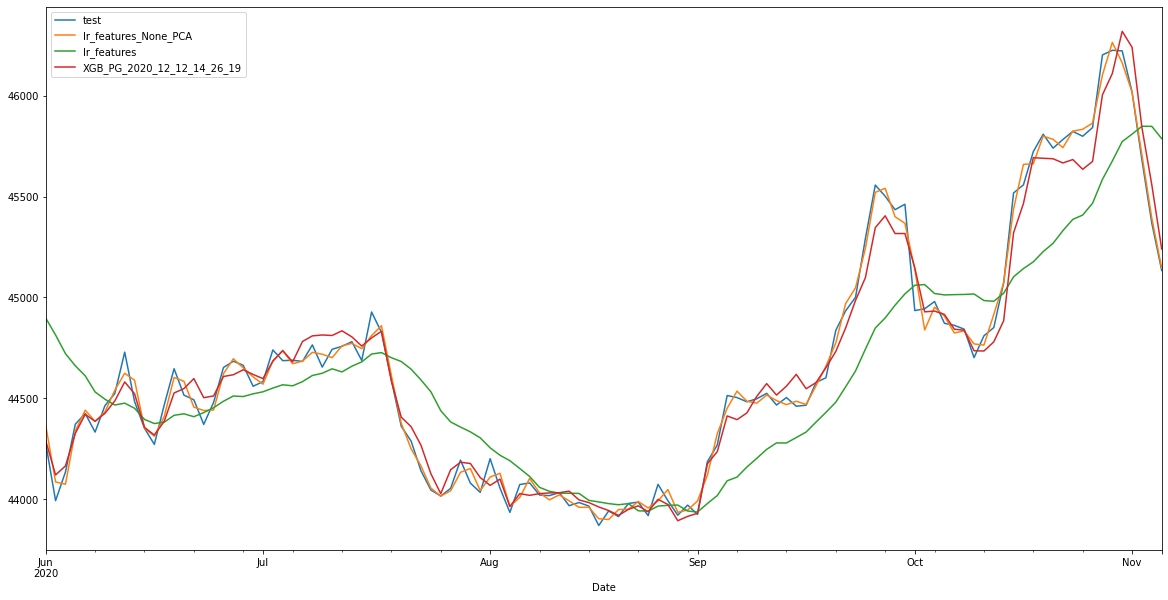

In [117]:
df_predictrions.loc['2020-06':,['test','lr_features_None_PCA','lr_features','XGB_PG_2020_12_12_14_26_19']].plot(figsize = (20,10))
plt.show()

### Last model -  Voting Regressor

In [137]:
start = datetime.now()

print(f'Line start at: {start}')

vr_estimators = [
                ('LinearRegression', models_from_files[10][1].best_estimator_),
                ('ElasticNet', models_from_files[3][1].best_estimator_),
                ('XGB_PG', models_from_files[18][1].best_estimator_),
               ]

voting_clf_soft = VotingRegressor(
                                estimators=vr_estimators,
                                verbose=VERBOSE,
                                n_jobs = THREADS)


voting_clf_soft.fit(X_train, y_train)
end = datetime.now()

save_model(voting_clf_soft,filename='VotingRegressor')
print(f'Line end at: {end}')
print(f'The process took: {end - start}')

Line start at: 2020-12-12 17:13:37.033929
Line end at: 2020-12-12 17:14:07.419206
The process took: 0:00:30.385277


In [138]:
models_from_files = load_model('Models/Features/')
file_r2 = []
file_explained_variance_score = []
file_median_absolute_error = []
file_mean_squared_error = []
file_mean_absolute_error = []
file_labels = []
df_predictrions = pd.DataFrame(index = X_test.index)
df_predictrions['test'] = y_test
for name, model in models_from_files:
    file_labels.append(name)
    file_r2.append(metrics.r2_score(y_test, model.predict(X_test)))
    file_explained_variance_score.append(metrics.explained_variance_score(y_test, model.predict(X_test)))
    file_median_absolute_error.append( metrics.median_absolute_error(y_test, model.predict(X_test)))
    file_mean_squared_error.append(np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
    file_mean_absolute_error.append(metrics.mean_absolute_error(y_test, model.predict(X_test)))
    df_predictrions[name] = model.predict(X_test)
file_d = {'r2': file_r2, 
     'explained_variance_score': file_explained_variance_score, 
     'median_absolute_error': file_median_absolute_error,
     'mean_squared_error' : file_mean_squared_error,
     'mean_absolute_error' : file_mean_absolute_error,
    }

file_df_score = pd.DataFrame(data=file_d)
file_df_score.insert(loc=0, column='Method', value=file_labels)
file_df_score.sort_values(by = 'r2',ascending=False)

Model index 0: AdaBoost_features
Model index 1: BaggingRegressor_Ridge_features
Model index 2: BaggingRegressor_tree_features
Model index 3: ElasticNet_2020_12_12_16_51_21
Model index 4: ElasticNet_features
Model index 5: ExtraTrees_features
Model index 6: GradientBoosting_features
Model index 7: knn_features
Model index 8: lasso_features
Model index 9: lr_features
Model index 10: lr_features_None_PCA
Model index 11: MLPRegressor_features
Model index 12: rf_features
Model index 13: ridge_features
Model index 14: svr_features
Model index 15: tree_features
Model index 16: VotingRegressor_2020_12_12_17_14_07
Model index 17: XGB_PD_2020_12_12_12_36_38
Model index 18: XGB_PD_features
Model index 19: XGB_PG_2020_12_12_14_26_19
Model index 20: XGB_PG_features


,Method,r2,explained_variance_score,median_absolute_error,mean_squared_error,mean_absolute_error
10,lr_features_None_PCA,0.997160,0.997163,26.336822,50.676823,36.252926
16,VotingRegressor_2020_12_12_17_14_07,0.996895,0.996896,28.663578,52.996309,38.372624
3,ElasticNet_2020_12_12_16_51_21,0.995959,0.995968,32.513976,60.455324,43.813032
19,XGB_PG_2020_12_12_14_26_19,0.993240,0.993244,48.296875,78.193053,58.268507
14,svr_features,0.937659,0.940609,137.040547,237.450856,175.963331
1,BaggingRegressor_Ridge_features,0.935907,0.936314,132.650267,240.764137,170.352320
9,lr_features,0.935823,0.936278,132.551078,240.921425,170.532260
8,lasso_features,0.935797,0.936302,132.288639,240.970478,170.452915
13,ridge_features,0.935776,0.936273,132.524216,241.010425,170.546005
11,MLPRegressor_features,0.934123,0.934929,145.747585,244.092161,180.632944


In [146]:
df_predictrions.

Index(['test', 'AdaBoost_features', 'BaggingRegressor_Ridge_features',
       'BaggingRegressor_tree_features', 'ElasticNet_2020_12_12_16_51_21',
       'ElasticNet_features', 'ExtraTrees_features',
       'GradientBoosting_features', 'knn_features', 'lasso_features',
       'lr_features', 'lr_features_None_PCA', 'MLPRegressor_features',
       'rf_features', 'ridge_features', 'svr_features', 'tree_features',
       'VotingRegressor_2020_12_12_17_14_07', 'XGB_PD_2020_12_12_12_36_38',
       'XGB_PD_features', 'XGB_PG_2020_12_12_14_26_19', 'XGB_PG_features'],
      dtype='object')

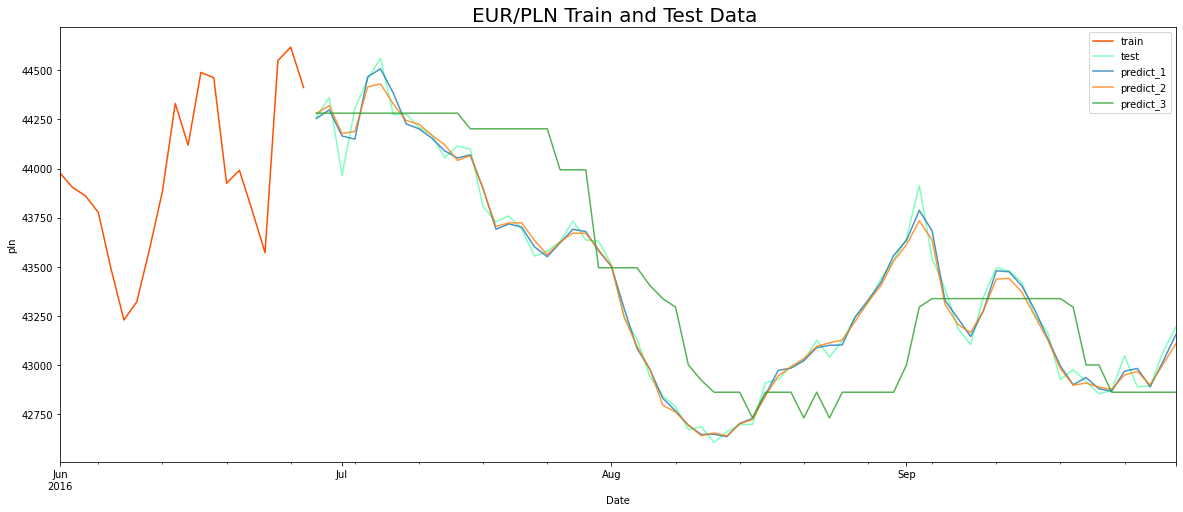

In [153]:
combine_plots(y_train.PLN, y_test.PLN,
              predict=[df_predictrions['lr_features_None_PCA'].values,
                       df_predictrions['VotingRegressor_2020_12_12_17_14_07'].values,
                       df_predictrions['AdaBoost_features'].values,
                      ],
              index = df_pl2.index,
              zoom_start='2016-06',
              zoom_end='2016-09')

## Naive Forecast

In [161]:
def naive_forecast(ts, period):
    actual = ts[period:]
    preds = ts.shift(period)[period:]
    return np.sqrt(metrics.mean_squared_error(actual, preds))

In [163]:
naive_forecast(y_test, period=1)

123.77045641138174

### Baseline Performance

In [164]:
for i in range(1,8):
    print(f'{i}: {naive_forecast(y_test, period=i)}')

1: 123.77045641138174
2: 178.90721883574713
3: 226.6395583696488
4: 267.34210887438803
5: 302.2981907208083
6: 336.03467175117703
7: 364.1051000656339


## Forcast for Linear Regression

In [170]:
def prepare_data(X, y, period, split_ratio=0.8):
    # define index border between train and test
    split_index = int(split_ratio*X.shape[0])
    
    # shift the features; remove missing values by slicing; target should be aligned with features
    X_shift = X.shift(period)[period:]
    y_shift = y[period:]
    
    # split original features and target on index
    X_train, X_test = X_shift[:split_index], X_shift[split_index:]
    y_train, y_test = y_shift[:split_index], y_shift[split_index:]
    
    return X_train, y_train, X_test, y_test

In [167]:
models_from_files[10][1].best_params_

{'lr__normalize': False,
 'pca__n_components': None,
 'polynomialfeatures__degree': 1,
 'scale': None,
 'transform': None}

In [169]:
models_from_files[10][1].estimator

Pipeline(steps=[('transform', PowerTransformer()), ('scale', MinMaxScaler()),
                ('pca', PCA(n_components=0.8)),
                ('polynomialfeatures', PolynomialFeatures()),
                ('lr', LinearRegression())])

In [203]:
# pipeline definition
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.9)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('lr', LinearRegression())
]
pipeline = Pipeline(steps=steps)

lr_preds = []
for period in range(1,8):
    X_train, y_train, X_test, y_test = prepare_data(X, y, period=period, split_ratio=0.8)

    params = {
            'transform': [None],
            'scale': [None],
            'pca__n_components': [None],
            'polynomialfeatures__degree': [1],
            'lr__normalize': [False],
    }
    
    cv = TimeSeriesSplit(n_splits=5).split(X_train)
    grid_lr = GridSearchCV(pipeline, param_grid=params, cv=cv, verbose=0)
    grid_lr.fit(X_train, y_train)
    lr_model = grid_lr.best_estimator_
    score = np.sqrt(metrics.mean_squared_error(lr_model.predict(X_test), y_test))
    pred = lr_model.predict(X.tail(1))[0][0]
    test_val = y_test.tail(1).values[0]
    lr_preds.append(pred)
    print(f'Period: {period}')
    print(f'Forecast: {round(pred)} +/- {score}')
    
    

Period: 1
Forecast: 44997 +/- 55.19997410890959
Period: 2
Forecast: 44936 +/- 55.147857500632995
Period: 3
Forecast: 44947 +/- 137.96823730981095
Period: 4
Forecast: 44971 +/- 196.22825662292962
Period: 5
Forecast: 45002 +/- 245.2435536272864
Period: 6
Forecast: 45005 +/- 288.2075044541287
Period: 7
Forecast: 44993 +/- 328.12383539279244


In [196]:
y_test.tail(1)

,PLN
Date,
2020-11-05,45134.0


In [197]:
df_pl.tail(5)

,PLN
Date,
2020-11-03,45680.0
2020-11-04,45368.0
2020-11-05,45134.0
2020-11-06,45263.0
2020-11-09,44670.0


In [199]:
models_from_files[14][1].best_params_

{'pca__n_components': 0.8,
 'polynomialfeatures__degree': 1,
 'scale': StandardScaler(),
 'svr__C': 10000,
 'svr__gamma': 0.0001,
 'transform': None}

## Forcast for SVR - RBF

In [201]:
# pipeline definition
steps = [
    ('transform', PowerTransformer(method='yeo-johnson')), 
    ('scale', MinMaxScaler()), 
    ('pca', PCA(n_components=0.9)), # to remove highly correlated features
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('svr', SVR(kernel='rbf',C=1))
]
pipeline = Pipeline(steps=steps)

svr_preds = []
for period in range(1,8):
    X_train, y_train, X_test, y_test = prepare_data(X, y, period=period, split_ratio=0.8)

    params = {
            'transform': [None],
            'scale': [StandardScaler()],
            'pca__n_components': [0.8],
            'polynomialfeatures__degree': [1],
            'svr__C': [10000],
            'svr__gamma': [0.0001]
}
    
    cv = TimeSeriesSplit(n_splits=5).split(X_train)
    grid_svr = GridSearchCV(pipeline, param_grid=params, cv=cv, verbose=0)
    grid_svr.fit(X_train, y_train)
    svr_model = grid_svr.best_estimator_
    score_svr = np.sqrt(metrics.mean_squared_error(lr_model.predict(X_test), y_test))
    pred_svr = svr_model.predict(X.tail(1))[0]
    test_val = y_test.tail(1).values[0]
    svr_preds.append(pred_svr)
    print(f'Period: {period}')
    print(f'Forecast: {round(pred_svr)} +/- {score_svr}')
    
    


    
    

Period: 1
Forecast: 45864 +/- 108.26315018194815
Period: 2
Forecast: 45818 +/- 113.81211113076493
Period: 3
Forecast: 45816 +/- 171.70899022846044
Period: 4
Forecast: 45809 +/- 218.92122370317472
Period: 5
Forecast: 45792 +/- 259.93159611416513
Period: 6
Forecast: 45803 +/- 295.5348683648941
Period: 7
Forecast: 45810 +/- 328.12383539279244


### Comparison

In [224]:
lr_result = np.array(lr_preds[:2])
lr_result

array([44997.01616096, 44935.98383904])

In [225]:
svr_result = np.array(svr_preds[:2])
svr_result

array([45864.05085464, 45817.87323634])

In [226]:
ARIMA_0_1_1 = np.array([45267.42154732, 45268.0400499])
ARIMA_0_1_1

array([45267.42154732, 45268.0400499 ])

In [228]:
#real data
real = [i[0] for i in df_pl.tail(2).values.tolist()]
real = np.array(real)
real

array([45263., 44670.])

array([ 265.98383904, -265.98383904])

In [230]:
print(f'Differences for LR model {np.abs(lr_result - real)}')
print(f'Differences for SVR model {np.abs(svr_result - real)}')
print(f'Differences for ARIMA_0_1_1 model {np.abs(ARIMA_0_1_1 - real)}')

Differences for LR model [265.98383904 265.98383904]
Differences for SVR model [ 601.05085464 1147.87323634]
Differences for ARIMA_0_1_1 model [  4.42154732 598.0400499 ]


We see that for first prediction ARIMA model have the best result. For second prediction LR look better.

# Conclusions

The project presents many tools for the analysis and processing of time series data.

Thinking with common sense, I did not count for long-term predictions. Given the high volatility of the PLN currency, it is necessary to refit the model frequently. I intend to develop my model with new methods and predictive techniques as well as expand the ones already presented in the project.

1. Appropriate collection and preparation of data helps in working freely with data. If there is more data than we need at the beginning, it can be helpful in later work along with the development of the project.

2. Pure ARIMA model without cyclical refitting is not a good tool for long-term forecasting for foreign exchange. Because it can only show the trend.

3. A good solution is to expand the ARIMA model to the ARIMAX model, which, thanks to additional data, can better predict future events.

The Machine Learning approach is also an effective predictive tool but:

1. Data transformations do not always improve predictions of Machine Learning models. Most models do not use scaling and no power functions to improve data quality.

2. The introduction of additional variables did not improve the prediction of Machine Learning models which requires further investigation. Because I was hoping that, just like in reality, external factors affect exchange rates and the same effect could be captured in Machine Learning models.
3. There are several ML models that better cope with the investigated problem, eg Linear Regression.

General

1. It would be worth expanding the model with NLP tools to take into account the statements of politicians and people who have an impact on the country's monetary policy.
2. It is also worth acquiring professional knowledge in the field of currency exchange for a better interpretation of changes in the market
3. It is also worth looking for a better source of data such as yahoo finance, which provides a library that allows you to load interest as the currency data as well as the stock market indices, the disadvantage is the lack of Polish stock exchange indices.

We encourage you to follow this project in the future as I intend to develop it.